In [7]:
%matplotlib inline
import math
import time 
import numpy as np
import torch as t
import matplotlib.pyplot as plt

In [3]:
## vectorization is faster! 

n = 1000
a = t.ones(n)
b = t.ones(n)
c = t.zeros(n)
t_0 = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
print(f"{time.time() - t_0} sec")

t_0 = time.time()
d = a + b
print(f"{time.time() - t_0} sec")
## not as big of a difference on my computer... 1 order of magnitude instead of 3

0.005253314971923828 sec
0.0002167224884033203 sec


Text(0, 0.5, 'p(x)')

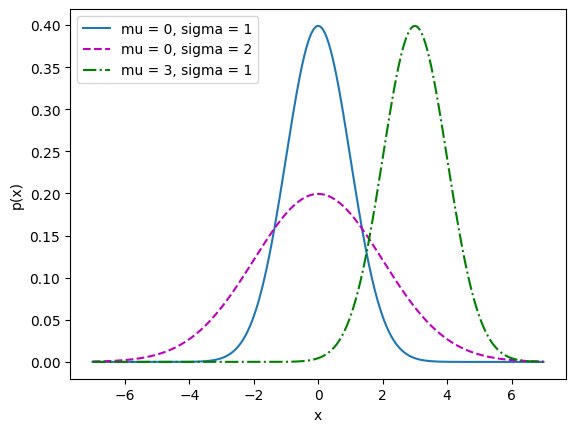

In [24]:
## define the normal distribution (already done in pytorch)

def normal(x, mu, sig):
    norm = 1/np.sqrt(2*t.pi*sig**2)
    p = norm * np.exp(-1/(2*sig**2)*(x - mu)**2)
    return p

x = t.arange(-7,7,0.01)

musigs = [(0,1,'-'), (0,2, 'm--'), (3,1, 'g-.')]
# plt.plot(x,)
#ps = [normal(x,musig[0], musig[1]).numpy() for musig in musigs]
#plt.plot(x.numpy(),ps)
for musig in musigs:
    plt.plot(x, normal(x,musig[0], musig[1]), musig[2])
plt.legend([f'mu = {musig[0]}, sigma = {musig[1]}' for musig in musigs])
plt.xlabel('x')
plt.ylabel('p(x)')

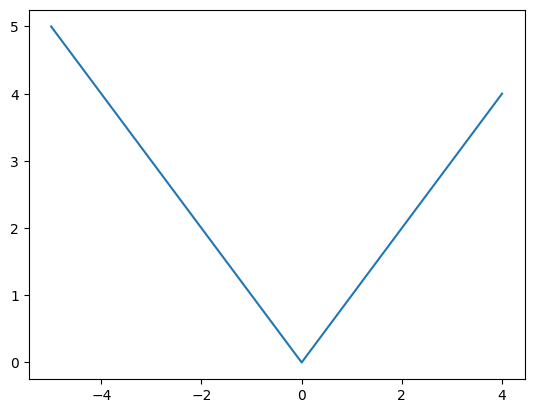

In [36]:
x_2 = np.arange(-5,5)
plt.plot(x_2,np.abs(x_2))

tensor([-7.0000, -6.9900, -6.9800,  ...,  6.9700,  6.9800,  6.9900])

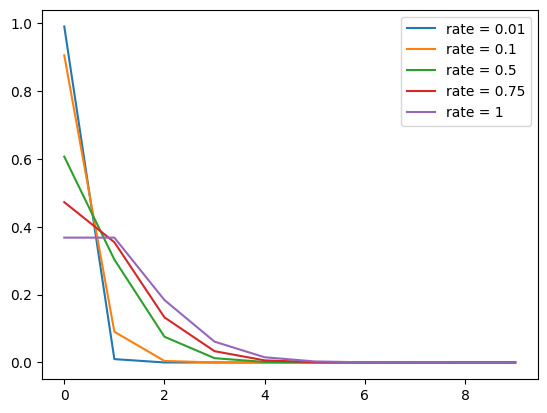

In [53]:
## poisson distribution

def poisson(events, rate):
    p = rate**events * np.exp(-rate)/math.factorial(events)
    return p

def poisson_loss(actual, estimated):
    loss = actual * estimated - np.exp(estimated)
    return loss

events = np.arange(0,10)
rates = [.01,.1,.5,.75,1]
for rate in rates:
    plt.plot([poisson(event,rate) for event in events])
plt.legend([f'rate = {rate}' for rate in rates])

x


tensor([-7.0000, -6.9900, -6.9800,  ...,  6.9700,  6.9800,  6.9900])

Softmax regression